In [36]:
# good question and answer
# how can this analysis help make a business decision, give context for what they can do with that information
# put the holes in data in the presentation
# look for data first to inform the project

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
happiness_index = pd.read_csv('Resources/happiness_index_2021.csv')
original_netflix = pd.read_csv("Resources/netflix full.csv")

In [3]:
original_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  9425 non-null   object 
 1   Genre                  9400 non-null   object 
 2   Tags                   9389 non-null   object 
 3   Languages              9266 non-null   object 
 4   Series or Movie        9425 non-null   object 
 5   Hidden Gem Score       9415 non-null   float64
 6   Country Availability   9414 non-null   object 
 7   Runtime                9424 non-null   object 
 8   View Rating            6827 non-null   object 
 9   IMDb Score             9417 non-null   float64
 10  Rotten Tomatoes Score  5445 non-null   float64
 11  Metacritic Score       4082 non-null   float64
 12  Awards Received        5226 non-null   float64
 13  Awards Nominated For   6376 non-null   float64
 14  Boxoffice              3754 non-null   object 
 15  Rele

In [4]:
# Data Quality Check
# Comparing number of countries and languages a title is available.  Number of countries & languages expect to be reasonably close
# original_netflix[['Title','Languages','Country Availability']]

# # counting number of languages and countries in respective cell
# num_Language_per_title_test = original_netflix['Languages'].str.count(',')+1
# num_countries_per_title_test = original_netflix['Country Availability'].str.count(',')+1

# # setting those counts to append to the dataframe
# country_language_df = original_netflix
# country_language_df["# Countries"] = num_countries_per_title_test
# country_language_df["# Languages"] = num_Language_per_title_test
# country_language_df[['Title','Languages','Country Availability',"# Languages",'# Countries']]

# export results to csv for analysis
# country_language_df.to_csv(r"C:\Users\christina\Desktop\titles_count_languages.csv")

In [4]:
# Filling in blank values
# where Languages is blank, enter English
# where country availability is blank, enter United States

# 159 titles do not have languages associated with it

# Where languages are available, the list may not be complete. Example: Mind Explained is available in 36 countries, but
# is listed as only available in English. Checked on Netflix: title available in Portuguese, Spanish & French, Chinese subtitles
# in the US.

cleaned_df = original_netflix
cleaned_df['Country Availability'].fillna('United States', inplace=True)
cleaned_df['Languages'].fillna('English', inplace=True)
cleaned_df[['Title','Languages','Country Availability']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 9425 non-null   object
 1   Languages             9425 non-null   object
 2   Country Availability  9425 non-null   object
dtypes: object(3)
memory usage: 221.0+ KB


In [5]:
cleaned_df.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'View Rating',
       'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score',
       'Awards Received', 'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'IMDb Votes', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [6]:
# total titles available in each country
explode_Country = cleaned_df[['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'View Rating',
       'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score',
       'Awards Received', 'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'IMDb Votes']]
explode_Country.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,205926.0
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,2838.0
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,NaN,7.4,NaN,NaN,NaN,NaN,NaN,03 Dec 2020,2021-03-03,131.0
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,7.5,NaN,NaN,2.0,4.0,NaN,14 Jun 2011,2021-03-03,47.0
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,NaN,6.7,NaN,NaN,2.0,1.0,NaN,31 Oct 1949,2021-03-03,88.0


In [7]:
# code to separate comma separated country availability
explode_Country.set_index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Runtime', 'View Rating',
       'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score',
       'Awards Received', 'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'IMDb Votes'],inplace=True)
explode_Country = explode_Country.apply(lambda x: x.str.split(',').explode().str.strip())
explode_Country.head()

,,,,,,,,,,,,,,,,,Country Availability
Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes,
Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror Programmes,Thai TV Programmes","Swedish, Spanish",Series,4.3,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,205926.0,Thailand
HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,1-2 hour,R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,2838.0,Canada
The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai Comedies,Thai Films",Thai,Movie,8.6,> 2 hrs,NaN,7.4,NaN,NaN,NaN,NaN,NaN,03 Dec 2020,2021-03-03,131.0,Thailand
Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,< 30 minutes,NaN,7.5,NaN,NaN,2.0,4.0,NaN,14 Jun 2011,2021-03-03,47.0,Poland
Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Books,Period Pieces,Swedish Movies",Swedish,Movie,8.3,1-2 hour,NaN,6.7,NaN,NaN,2.0,1.0,NaN,31 Oct 1949,2021-03-03,88.0,Lithuania


In [8]:
explode_Country.reset_index(inplace=True)
explode_Country.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes,Country Availability
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,205926.0,Thailand
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,1-2 hour,R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,2838.0,Canada
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,> 2 hrs,NaN,7.4,NaN,NaN,NaN,NaN,NaN,03 Dec 2020,2021-03-03,131.0,Thailand
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,< 30 minutes,NaN,7.5,NaN,NaN,2.0,4.0,NaN,14 Jun 2011,2021-03-03,47.0,Poland
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,1-2 hour,NaN,6.7,NaN,NaN,2.0,1.0,NaN,31 Oct 1949,2021-03-03,88.0,Lithuania


In [9]:
# code to separate comma further by language & country availability
explode_Lang_Country = explode_Country
explode_Lang_Country.set_index(['Title', 'Genre', 'Tags', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'View Rating',
       'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score',
       'Awards Received', 'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'IMDb Votes'],inplace=True)
explode_Lang_Country = explode_Lang_Country.apply(lambda x: x.str.split(',').explode().str.strip())
explode_Lang_Country.reset_index(inplace=True)
explode_Lang_Country.head()

,Title,Genre,Tags,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes,Languages
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,205926.0,Swedish
1,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,205926.0,Spanish
2,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",Movie,7.0,Canada,1-2 hour,R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,2838.0,English
3,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Movie,8.6,Thailand,> 2 hrs,NaN,7.4,NaN,NaN,NaN,NaN,NaN,03 Dec 2020,2021-03-03,131.0,Thai
4,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Series,8.7,Poland,< 30 minutes,NaN,7.5,NaN,NaN,2.0,4.0,NaN,14 Jun 2011,2021-03-03,47.0,Polish


In [10]:
# code to separate comma further by gemre & language & country availability
explode_genre_Lang_Country = explode_Lang_Country
explode_genre_Lang_Country.set_index(['Title', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'View Rating',
       'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score',
       'Awards Received', 'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'IMDb Votes'],inplace=True)
explode_genre_Lang_Country = explode_Lang_Country.apply(lambda x: x.str.split(',').explode().str.strip())
explode_genre_Lang_Country.reset_index(inplace=True)
explode_genre_Lang_Country.head()

,Title,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes,Genre
0,Lets Fight Ghost,"Comedy Programmes,Romantic TV Comedies,Horror ...",Swedish,Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,205926.0,Crime
1,Lets Fight Ghost,"Comedy Programmes,Romantic TV Comedies,Horror ...",Swedish,Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,205926.0,Drama
2,Lets Fight Ghost,"Comedy Programmes,Romantic TV Comedies,Horror ...",Swedish,Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,205926.0,Fantasy
3,Lets Fight Ghost,"Comedy Programmes,Romantic TV Comedies,Horror ...",Swedish,Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,205926.0,Horror
4,Lets Fight Ghost,"Comedy Programmes,Romantic TV Comedies,Horror ...",Swedish,Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,205926.0,Romance


In [12]:
# Main dataset for manipulation
# explode_genre_Lang_Country.to_csv(r"Resources/explode_genre_country_language.csv")

In [11]:
# count number of uniqe languages, titles, and genres available in each country
diversity = explode_genre_Lang_Country[['Title','Languages','Country Availability']].drop_duplicates()
diversity = diversity.groupby('Country Availability').nunique().sort_values('Languages',ascending=False)
diversity = diversity.reset_index()

In [12]:
diversity.head()


,Country Availability,Title,Languages
0,Belgium,3462,136
1,Czech Republic,3785,133
2,Italy,3250,132
3,Romania,3591,132
4,Hungary,3690,132


In [13]:
diversity.describe()

,Title,Languages
count,36.000000,36.000000
mean,3372.166667,125.916667
std,233.425118,4.351519
min,2928.000000,115.000000
25%,3205.000000,123.000000
50%,3311.500000,125.500000
75%,3584.250000,129.000000
max,3861.000000,136.000000


In [14]:
hp_countries = happiness_index
hp_countries.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [15]:
hp_countries['Country Availability'] = hp_countries['Country name'].str.strip()

In [17]:
# Incomplete data.  36 countries in Netflix data.  Netflix website says Netflix is in 190 countries.  
# Happiness Index has 149 countries.  Inconsistent values.

test = pd.merge(hp_countries,diversity,how='outer',on="Country Availability")
test =test[{'Country Availability','Title','Languages','Ladder score'}].fillna(0).sort_values("Ladder score", ascending=False).reset_index(drop=True)
test

,Languages,Ladder score,Country Availability,Title
0,0.0,7.842,Finland,0.0
1,0.0,7.620,Denmark,0.0
2,128.0,7.571,Switzerland,3509.0
3,119.0,7.554,Iceland,3193.0
4,128.0,7.464,Netherlands,3164.0
...,...,...,...,...
145,0.0,3.467,Botswana,0.0
146,0.0,3.415,Rwanda,0.0
147,0.0,3.145,Zimbabwe,0.0
148,0.0,2.523,Afghanistan,0.0


In [47]:
test2 = pd.merge(hp_countries,diversity,how='outer',on="Country Availability")
test2 =test2[{'Country Availability','Title','Languages','Ladder score'}].dropna(subset=['Languages']).fillna(0).sort_values("Ladder score", ascending=False).reset_index(drop=True)
test2

,Languages,Ladder score,Country Availability,Title
0,128.0,7.571,Switzerland,3509.0
1,119.0,7.554,Iceland,3193.0
2,128.0,7.464,Netherlands,3164.0
3,121.0,7.363,Sweden,3046.0
4,125.0,7.183,Australia,3582.0
5,121.0,7.157,Israel,3209.0
6,129.0,7.155,Germany,3470.0
7,130.0,7.103,Canada,3665.0
8,126.0,7.064,United Kingdom,3861.0
9,133.0,6.965,Czech Republic,3785.0


In [25]:
# test.to_csv(r"C:\Users\christina\Desktop\happiness index.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Languages             150 non-null    float64
 1   Ladder score          150 non-null    float64
 2   Country Availability  150 non-null    object 
 3   Title                 150 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.8+ KB


In [48]:
h_slope, h_int, h_r, hr_p, h_std = st.linregress(test2['Ladder score'],test2['Languages'])
h_fit = h_slope*test2['Ladder score']+h_int

In [49]:
h_r

0.1562380915083701

In [46]:
test2['Ladder score'].max()

7.571

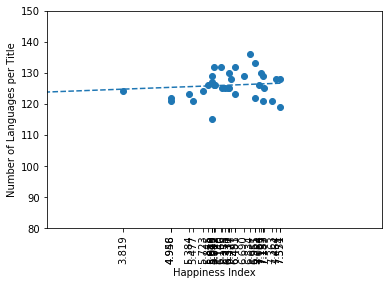

In [50]:
happiness_index = test2.loc[:,'Ladder score']
unique_Languages = test2.loc[:,'Languages']
plt.scatter(happiness_index,unique_Languages)
plt.plot(happiness_index, h_fit, "--")
plt.xticks(happiness_index, rotation=90)
plt.axis([2,10,80,150])
plt.xlabel('Happiness Index')
plt.ylabel('Number of Languages per Title')
plt.show()